In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit.qasm3 import dump, dumps, load
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# 2 - Advanced Operators

## Exercise 1

Create a circuit with (at least) the following values:

- width: 4

- depth: 7

- unitary factor: 5

Propiedades del Circuito:
- Ancho: 12
- Profundidad: 7
- Factores Unitarios: 5


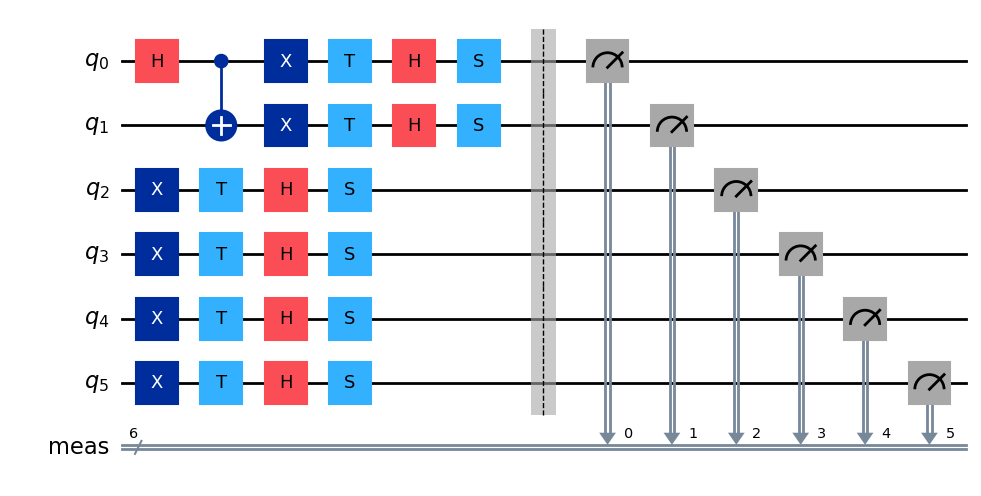

In [2]:
qc = QuantumCircuit(6)

qc.h(0)
qc.cx(0, 1)

for i in range(6):
    qc.x(i)
    qc.t(i)
    qc.h(i)
    qc.s(i)

qc.measure_all()

print(f"Propiedades del Circuito:")
print(f"- Ancho: {qc.width()}")
print(f"- Profundidad: {qc.depth()}")
print(f"- Factores Unitarios: {qc.num_unitary_factors()}")

qc.draw("mpl")

## Exercise 2

Modify the circuit to include parametric gates in half of its qubits. Run it and obtain the histogram of the initial version and compare it with the parametric one for different values, reasoning about the difference in the results.

Para convertir el circuito del ejercicio anterior en un circuito variacional (parametrizado), sustituimos el bloque de puertas fijas (X, T, H, S) por una puerta $R_y(\theta)$.

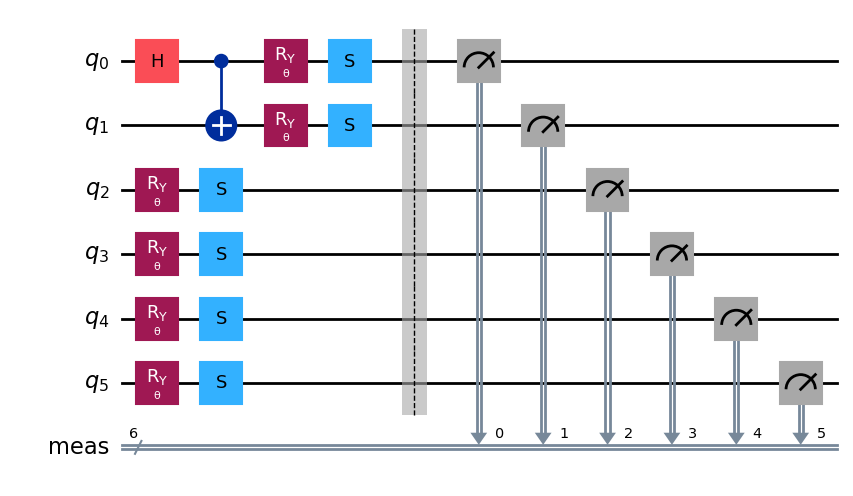

In [3]:
theta = Parameter("θ")

qc_param = QuantumCircuit(6)

qc_param.h(0)
qc_param.cx(0, 1)

for i in range(6):
    qc_param.ry(theta, i)
    qc_param.s(i)

qc_param.measure_all()

qc_param.draw("mpl")

Ejecutamos los circuitos:

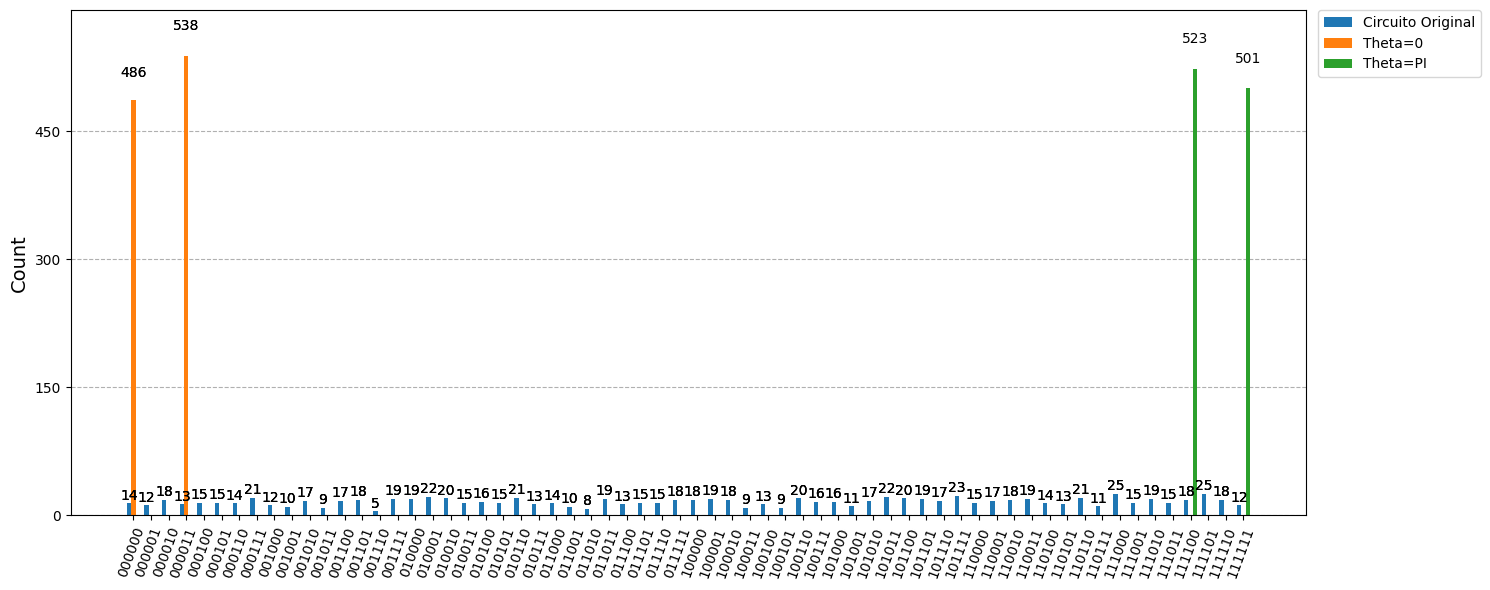

In [4]:
backend = AerSimulator()

counts = backend.run(qc).result().get_counts()

qc_0 = qc_param.assign_parameters({theta: 0})
counts_0 = backend.run(qc_0).result().get_counts()

qc_pi = qc_param.assign_parameters({theta: np.pi})
counts_pi = backend.run(qc_pi).result().get_counts()

plot_histogram(
    [counts, counts_0, counts_pi],
    legend=["Circuito Original", "Theta=0", "Theta=PI"],
    figsize=(15, 6),
)

En el **circuito original**, las puertas aplican transformaciones complejas de fase y superposición que dispersan la probabilidad, haciendo que todos los estados sean equiprobables.

En el caso de $\theta = 0$, la puerta paramétrica $R_y(0)$ actúa como la identidad, y la puerta S añade una fase relativa que no afecta a la probabilidad de medición en la base computacional.

En el caso de $\theta = \pi$, la puerta $R_y(\pi)$ aplica una rotación de $pi$ rad, cambiando los 1 por los 0. Lo que hace que los estados medidos en este caso sean los contrarios a los del caso anterior.

## Ejercicio 3

Convert the initial circuit to qasm. Save it to disk and load it.

Creamos el fichero y volcamos el circuito en qasm en dicho fichero.

In [5]:
filename = "circuito_ejercicio.qasm"

with open(filename, "w") as f:
    dump(qc, f)

Si el fichero existe, lo abrimos, cargamos el circuito y lo dibujamos.

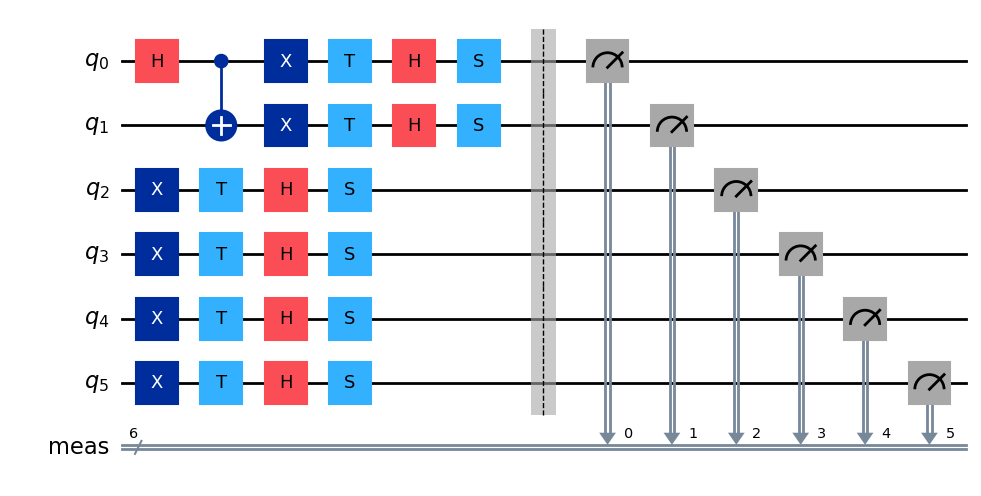

In [6]:
if os.path.exists(filename):
    with open(filename, "r") as f:
        qc_loaded = load(f.name)

    display(qc_loaded.draw("mpl"))